In [1]:
import matplotlib.pyplot as plt

from typing import Annotated

from datetime import datetime, timedelta
from config import *
from data.util import crop_q_between, extract_week_day, POINTS_PER_DAY

%matplotlib inline

%reload_ext autoreload
%autoreload 2

In [6]:
READ_START_DATE = datetime.strptime(CONFIG['READ_START_DATE'], DATE_FORMAT)
READ_END_DATE = datetime.strptime(CONFIG['READ_END_DATE'], DATE_FORMAT)

# One week Monday - Monday
PLOT_START_DATE = datetime(2021, 5, 7)
PLOT_END_DATE = PLOT_START_DATE + timedelta(days=7)

SECTION_INDEX = 9

In [17]:
mat_q = torch.real(torch.load(out_path('mat_q_trend.pt')))
mat_q = mat_q[:, SECTION_INDEX]
mat_q_week = crop_q_between(mat_q, READ_START_DATE,
                            READ_END_DATE, PLOT_START_DATE, PLOT_END_DATE)
mat_q_week.shape

torch.Size([672])

In [18]:
def plot_week(week: Annotated[tuple[float], 3]):
    fig, axes = plt.subplots(3, 3)
    fig.delaxes(axes[2, 0])
    fig.delaxes(axes[2, 2])

    for day in range(7):
        plot_date = PLOT_START_DATE + timedelta(days=day)
        axis = axes[day // 3, 1 if day == 6 else (day % 3)]
        axis.set(title=plot_date.strftime('%A'))
        axis.plot(week[day])

    fig.tight_layout()
    fig.show()

/tmp/ipykernel_8293/1787220659.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


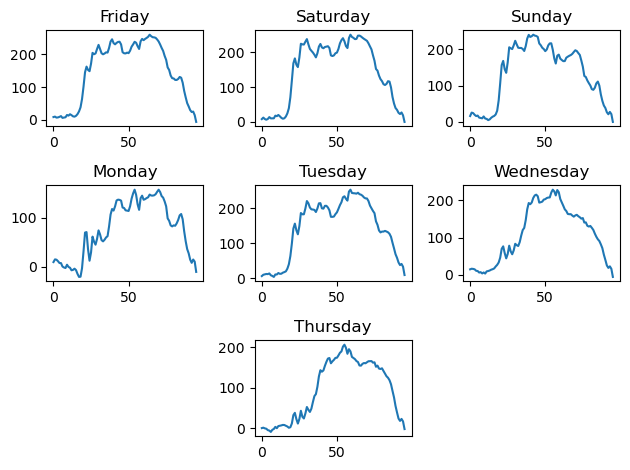

In [19]:
plot_week([extract_week_day(mat_q_week, PLOT_START_DATE, d) for d in range(7)])

Average per week day

/tmp/ipykernel_8293/1787220659.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


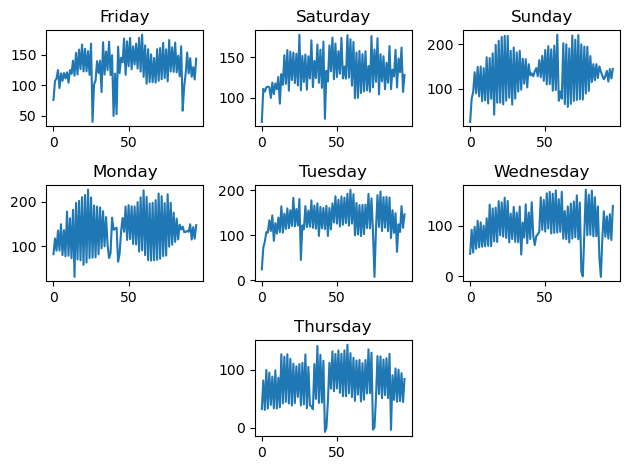

In [20]:
avg_week = [
    extract_week_day(mat_q, READ_START_DATE, d)
    .reshape((POINTS_PER_DAY, -1))
    .mean(dim=1)
    for d in range(7)
]
plot_week(avg_week)